In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def sense(x):
    return x

def simulate(Δt, x, u):
    x += Δt * u
    return x

def control(t, y):
    ux = -sqrt(3) * sin(t) - (1/2) * cos(t)
    uy = -sin(t) + sqrt(3)/2 * cos(t)
    return array([ux, uy])

tf = 2.*pi
Δt = 0.01*pi
time = linspace(0.,tf, int(tf / Δt) + 1)

x = array([3. + sqrt(3), 2. + 1])
x_log = [copy(x)]

for t in time:
    y = sense(x)
    u = control(t, y)
    x = simulate(Δt, x, u)
    x_log.append(copy(x))
    
x_log = array(x_log)

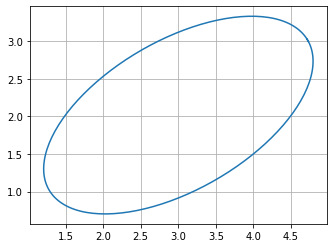

In [3]:
grid()
gca().set_aspect("equal")
plot(x_log[:,0], x_log[:,1])

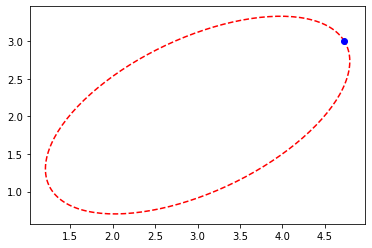

In [4]:
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
    


fig, ax = plt.subplots()

def animate(t):
    ax.clear()
    
    # Path
    plot(x_log[:,0], x_log[:,1], 'r--')
    
    # Initial conditions
    plot(x_log[t,0], x_log[t,1], 'bo')
    
    

anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=60)

HTML(anim.to_jshtml())